**Name: Christ-Brian Amedjonekou**  
**Date: 11/05/2018**  
**TCET 2102-D278 (Telecommunications) Lab 1**  
**Fall 2018, Section: D278, Code: 37580**  
**Instructor: Layth Qaseer**

### Objectives

1. **Learn how to read, use, compare instruments that are dB/dBm-calibrated.**
2. **Relate dB measurements to Voltage measurements.**
3. **Determine the cuttoff frequencies of the RC low pass filter using the difference in dB measurements.**
4. **Evaluate the effects of instrument loading on frequency response.**
5. **Use Thevenin's theorem to calculate a circuit's loaded response.**
6. **Use Audio Test Set, its functions, ranges and limitations; connections, switches, dials, and indicator.**
7. **Use VOM to read dB values, and how the changing ranges affect the dB scale and input impedance.**

### Equipment

* **Audio Test Set**
* **Analog Volt Ohm Meter**
* **Oscilloscope**
* **Digital Multimeter**
* **10 k$\Omega \space \frac{1}{4}$-watt Resistor**
* **0.01 $\mu$F Capacitor**


### Theory

**Filters: Any combination of passive (R, L, and C) and/or active (transistors or operational amplifiers) elements designed to select or reject a band of frequencies is called a filter.**

*  In communication systems, filters are employed to pass those frequencies containing the desired information and to reject the remaining frequencies.

**Filters are employed to filter out any unwanted frequencies, commonly called noise, due to the nonlinear characteristics of some elec- tronic devices or signals picked up from the surrounding medium. In general, there are two classifications of filters:**

* Passive Filters - contains only passive elements (e.g: resistors, capacitors, inductors) **"Passive filters are those filters composed of series or parallel combinations of R, L, and C elements."**

    * Low Pass Filters

### Low Pass

$$A_V = \frac{V_O}{V_I}=  \frac{1}{\sqrt{\left(\frac{f_C}{f}\right)^2 + 1}} \angle{- \tan^{-1}\frac{f_C}{f}}$$ 

$$\textbf{Note that } f_C = \frac{1}{2\pi RC}$$

#### Butterworth Low Pass Filter

In [1]:
import math as m
def lowpassfilter_voltagegain(f_c, f, phase_degree= True):
    """Calculates the voltage gain given the frequency and cuttoff frequency 
    of the low pass filter. Returns a list featuring the magnitude and phase angle.
    The preset variable "phase_degree" is set to true to give an answer in degrees 
    for the phase angle."""
    magnitude = 1/m.sqrt(m.pow(f/f_c, 2) + 1)
    phase_angle = 0 - m.atan(f/f_c)
    if phase_degree == False:
        return [magnitude, phase_angle]
    else:
        return [magnitude, m.degrees(phase_angle)]

In [2]:
f = 101001
f_c = 100000
cuttoff1 = lowpassfilter_voltagegain(f_c, f = f_c)[0]
given_gain1 = lowpassfilter_voltagegain(f_c, f)[0]

In [3]:
from matplotlib import pyplot as plt
import numpy as np

list1 = [x for x in range(0, 500000)]
list2 = [lowpassfilter_voltagegain(100000, x)[0] for x in range(0, 500000)]
frequency = np.array(list1)
gain = np.array(list2)
plt.plot(frequency, gain)

In [4]:
def highpassfilter_voltagegain(f_c, f, phase_degree= True):
    """Calculates the voltage gain given the frequency and cuttoff frequency 
    of the high pass filter. Returns a list featuring the magnitude and phase angle.
    The preset variable "phase_degree" is set to true to give an answer in degrees 
    for the phase angle."""
    magnitude = 1/m.sqrt(m.pow(f_c/f, 2) + 1)
    phase_angle = 0 - m.atan(f_c/f)
    if phase_degree == False:
        return [magnitude, phase_angle]
    else:
        return [magnitude, m.degrees(phase_angle)]

In [5]:
cuttoff2 = highpassfilter_voltagegain(f_c, f = f_c)[0]
given_gain2 = highpassfilter_voltagegain(f_c, f)[0]

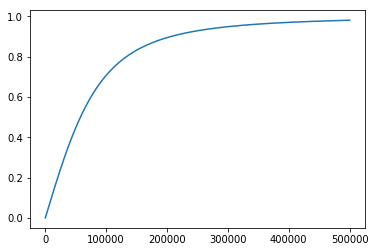

In [6]:
list3 = [x for x in range(1, 500000)]
list4 = [highpassfilter_voltagegain(100000, x)[0] for x in range(1, 500000)]
frequency1 = np.array(list3)
gain1 = np.array(list4)
plt.plot(frequency1, gain1)

In [7]:
{'cuttoff1': cuttoff1, 'cuttoff2': cuttoff2, 
 'given_gain1': given_gain1, 'given_gain2': given_gain2}

{'cuttoff1': 0.7071067811865475,
 'cuttoff2': 0.7071067811865475,
 'given_gain1': 0.7035766118785446,
 'given_gain2': 0.7106194137634488}

In [8]:
def frequency_blocked(gain, gain_c):
    """Determines whether input frequencies are blocked. This is based on the gains
    related to an arbitrary frequency (gain), and the cuffoff frequency (gain_c). 
    Returns an "allowed to pass" or "is blocked" message based on the type of filter."""
    if gain > gain_c:
        return 'Frequency is allowed to Pass'
    else:
        return 'Frequency is Blocked'

In [9]:
{'LP':frequency_blocked(given_gain1, cuttoff1), 
 'HP':frequency_blocked(given_gain2, cuttoff2)}

{'LP': 'Frequency is Blocked', 'HP': 'Frequency is allowed to Pass'}